<a href="https://colab.research.google.com/github/DilaksanThirugnanaselvam/project1/blob/main/Linear_Regression_using.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression
Task: Predict student score given the number Of hours spent by the student for studies

Input: Hours studies

#Output: Score

In [ ]:
print('Connecting to Google Drive...')
from google.colab import drive
drive.mount('/content/drive')
print('Done!')

Connecting to Google Drive...
Mounted at /content/drive
Done!



For this task of predicting a student's score based on the number of hours they study, we can implement a Simple Linear Regression model, where:

Input (X): Number of hours studied.

Output (y): Student's score.

We assume a linear relationship between hours studied and the score, meaning the equation will be:

𝑦
=
𝑚
𝑋
+
𝑐

where:

𝑦
y is the predicted score,
𝑋
X is the number of hours studied,
𝑚
m is the slope of the line (the weight of the model),
𝑐
c is the intercept.

Let's walk through the steps of building a Simple Linear Regression model using Python with libraries like scikit-learn.

**pandas**: Handles data in tabular formats (DataFrames) and is commonly used for data cleaning, exploration, and preparation.

**numpy**: Works with arrays and numerical data, providing mathematical functions for linear algebra, random sampling, etc.

**matplotlib.pyplot**: Used for creating static visualizations such as line charts, scatter plots, bar charts, etc.

**seaborn**: Built on top of matplotlib, provides attractive and informative statistical graphics, and is great for exploring and understanding data patterns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Linear Regression /w1_student_scores-220925-152435.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


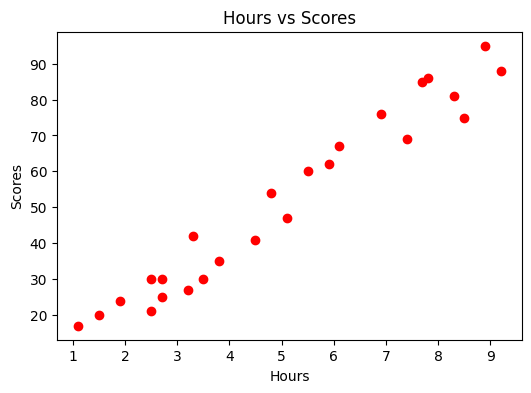

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'],'ro')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()  #shows the plot

#Calculate the Mean of Input (Hours) and Output (Scores):

In [ ]:
x_mean = np.mean(df['Hours'])
y_mean = np.mean(df['Scores'])
print(f'Mean of Hours: {x_mean}')
print(f'Mean of Scores: {y_mean}')


Mean of Hours: 5.012
Mean of Scores: 51.48


#Calculate Covariance and Variance (for the slope
𝛽
1
β
1
​
 ):
 We need to calculate the numerator and denominator for the slope formula.

Covariance term (Numerator):
∑
(
𝑋
𝑖
−
𝑋
ˉ
)
(
𝑌
𝑖
−
𝑌
ˉ
)
∑(X
i
​
 −
X
ˉ
 )(Y
i
​
 −
Y
ˉ
 )
Variance of X (Denominator):
∑
(
𝑋
𝑖
−
𝑋
ˉ
)
2
∑(X
i
​
 −
X
ˉ
 )
2

In [ ]:
# Numerator: Covariance between X and Y
df['xy_cov'] = (df['Hours'] - x_mean) * (df['Scores'] - y_mean)
covariance = np.sum(df['xy_cov'])

# Denominator: Variance of X (Hours)
df['x_var'] = (df['Hours'] - x_mean) ** 2
variance = np.sum(df['x_var'])

# Slope (beta_1)
beta_1 = covariance / variance
print(f'Slope (beta_1): {beta_1}')

# Intercept (beta_0)
beta_0 = y_mean - (beta_1 * x_mean)
print(f'Intercept (beta_0): {beta_0}')


Slope (beta_1): 9.775803390787473
Intercept (beta_0): 2.4836734053731817


In [ ]:
beta_1*7+beta_0

70.9142971408855

In [ ]:
score_predicated=beta_1*df['Hours']+beta_0

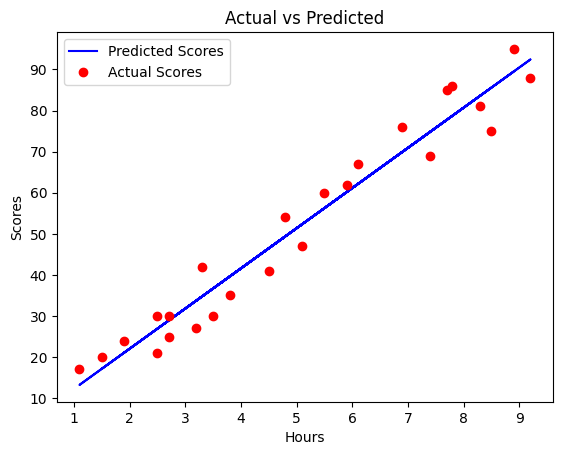

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming df contains the data
X = df[['Hours']]  # Feature matrix (2D array required for sklearn)
y = df['Scores']   # Target variable

# Step 1: Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Step 2: Predict the scores using the model
Scores_predicted = model.predict(X)  # Predicted scores based on hours studied

# Step 3: Plotting
import matplotlib.pyplot as plt

Hours = df['Hours']  # Hours studied
Scores_actual = df['Scores']  # Actual scores

# Plot the regression line (predicted scores)
plt.plot(Hours, Scores_predicted, label='Predicted Scores', color='blue')

# Plot the actual data points (scatter plot)
plt.plot(Hours, Scores_actual, 'ro', label='Actual Scores')  # 'ro' indicates red circles

# Add labels and title
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Show legend
plt.legend()

# Display the plot
plt.show()
